## Importing libararies

In [1]:
import numpy as np
from collections import Counter
from scipy import stats
from math import log2, sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
import six

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.model_selection import GridSearchCV

## Adult Dataset


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
columns_names = ['age','workclass','fnlwg','education','education_num','martial_status',
                 'ocupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week',
                 'country','target']
data = pd.read_csv("adult_data.csv",header=None,names=columns_names)
data.head()

,age,workclass,fnlwg,education,education_num,martial_status,ocupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.describe()

,age,fnlwg,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwg           32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   martial_status  32561 non-null  object
 6   ocupation       32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
data.isnull().sum()

age               0
workclass         0
fnlwg             0
education         0
education_num     0
martial_status    0
ocupation         0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
target            0
dtype: int64

In [9]:
data.shape

(32561, 15)

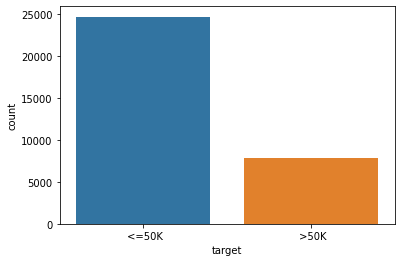

In [10]:
sns.countplot(x='target',data=data)

## Entrophy implementation

In [11]:
def entrophy(class_y):
  if len(class_y)<=1:
    return 0
  total_count = np.bincount(class_y)
  probabilities = total_count[np.nonzero(total_count)]/len(class_y)
  if len(probabilities)<=1:
    return 0
  return -np.sum(probabilities*np.log(probabilities))/np.log(len(probabilities))

In [13]:
## information gain

def information_gain(Y,X):
  conditional_entrophy =0
  for y in X:
    conditional_entrophy += (entrophy(y) * len(y)/len(Y))
  info_gain = entrophy(Y) - conditional_entrophy
  return info_gain


In [14]:
##testing 
test_class_y = [0,0,0,1,1,1,1]
print(entrophy(test_class_y))

previous_y = [0,0,0,1,1,1]
current_y = [[0,0],[1,1,1,0]]
print(information_gain(previous_y,current_y))

0.9852281360342515
0.4591479170272448
